# ニューラルネットワーク

## パーセプトロンからニューラルネットワークへ

パーセプトロンを再び考える

![perceptron0](./img/perceptron0.png)

ここでバイアスについて、重みがbで値が1固定の入力信号であると考えると、以下のように変形できる

![perceptron_bias](./img/perceptron_bias.png)

これによって、パーセプトロンの式を $入力値×重み$ に統一することができる（$a = \sum_{i=1}^n x_i*w_i$）

さらに、出力値 $y$ を得るための処理として、パーセプトロンでは $a \leqq 0 → 0$ ｜ $a > 0 → 1$ という条件分岐を行っている

このように、入力信号の総和を出力信号に変換するための処理関数を**活性化関数**と呼び、$h(a)$ で表す

つまり、パーセプトロンにおける活性化関数は `h(a) = 0 if a <= 0 else 1` と表現できる

このように、特定条件で0から1へ突然出力値が変わるような活性化関数を**ステップ関数**と呼ぶ

![perceptron_h](./img/perceptron_h.png)

### シグモイド関数
ステップ関数は微分することができないため、ニューラルネットワークにおいては、ステップ関数の代わりにシグモイド関数がよく使われてきた

$$
    シグモイド関数: h(a) = \frac{1}{1 + e^{-a}}
$$

In [1]:
"""
ステップ関数とシグモイド関数の比較
"""

# ステップ関数
step(a::Float64)::Float64 = (a <= 0 ? 0 : 1)

# シグモイド関数
sigmoid(a::Float64)::Float64 = 1 / (1 + exp(-a))

# プロット用｜横軸
## collect(start:interval:end): start〜endまでinterval刻みの数値配列を生成
a = collect(-5.0:0.1:5.0)

101-element Array{Float64,1}:
 -5.0
 -4.9
 -4.8
 -4.7
 -4.6
 -4.5
 -4.4
 -4.3
 -4.2
 -4.1
 -4.0
 -3.9
 -3.8
  ⋮  
  3.9
  4.0
  4.1
  4.2
  4.3
  4.4
  4.5
  4.6
  4.7
  4.8
  4.9
  5.0

In [2]:
# ステップ関数実行
## function.(array) で function(v) for v in array を実行
y = step.(a)

101-element Array{Float64,1}:
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮  
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0

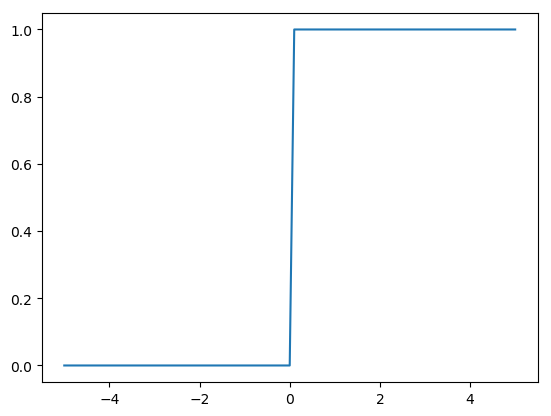

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f41835e72b0>

In [3]:
# PyPlotパッケージ利用
using PyPlot

# ステップ関数プロット
plot(a, y)

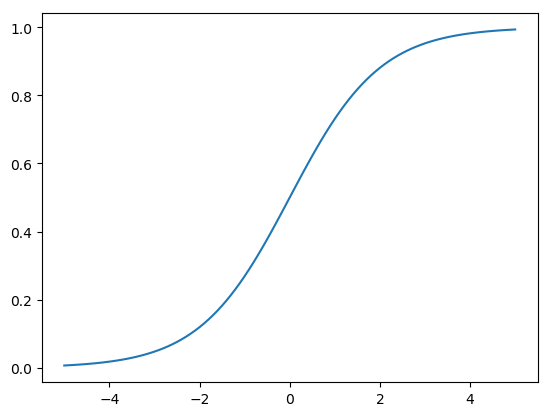

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f418336a0b8>

In [4]:
# シグモイド関数プロット
plot(a, sigmoid.(a))

### ステップ関数とシグモイド関数
ステップ関数とシグモイド関数は、上記グラフを見ても分かるように、滑らかさ（連続性）に違いがある

一方で、以下のような共通点もある

- 出力値は $0 \leqq y \leqq 1$ となる
    - 入力値が小さいほど 0 に近く、入力値が大きいほど 1 に近くなる
- 非線形関数である
    - 一時直線では表現できない関数である

### 非線形関数
ニューラルネットワークでは、活性化関数に非線形関数を用いる必要がある

逆に言えば、活性化関数に線形関数を用いてはならない

これは、線形関数を用いてしまうと、どれだけ層を深くしても、それと同じことを行う「隠れ層（中間層）のないネットワーク」が存在することになってしまうためである

例えば、活性化関数として $h(x) = cx$ という線形関数を採用し、$y(x) = h(h(h(x)))$ という3層ネットワークを構築したとする

このネットワークは $y(x) = c * c * c * x$ という乗算処理を行うが、$c$ は任意定数であることから、$y(x) = ax$（$a = c^3$）という1層ネットワークに等しくなってしまう

このように、線形関数を活性化関数として採用してしまうと、層を深くする意味がなくなってしまうため、必ず非線形関数を活性化関数とする必要がある

### ReLU関数
シグモイド関数は古くから活性化関数としてよく使われてきたが、最近では**ReLU（Rectified Linear Unit）関数**が採用されることが増えてきた

ReLU関数は、入力値が0以下なら0を出力し、入力値が0を超えたらその値をそのまま出力する

そのため、出力値が収束することはなく、より複雑な問題を解くことが可能である

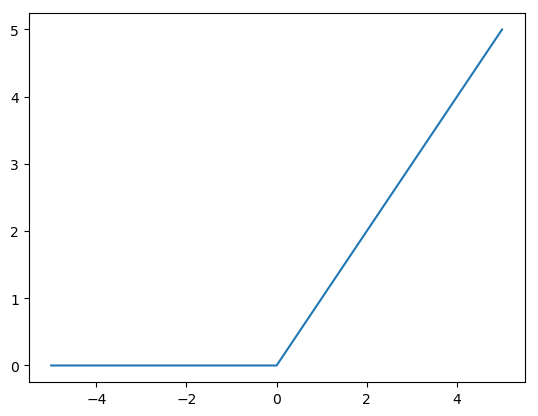

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f41835d1518>

In [5]:
# ReLU関数
ReLU(x::Float64)::Float64 = (x <= 0 ? 0 : x)

# プロット用｜入力値: -5.0, -4.9, ..., 4.9, 5.0
x = collect(-5.0:0.1:5.0)

# ReLU関数プロット
plot(x, ReLU.(x))

## 3層ニューラルネットワーク

### 3層ニューラルネットワークの実装
以下のような構造の3層ニューラルネットワークを実装する

![neural_network_3](./img/neural_network_3.png)

重みの記述を $w_{n p}^{(i)}$（n: 次層のニューロンの番号, p: 前層のニューロンの番号, i: 層の番号）とし、バイアスを加えると以下のようなネットワーク構造となる

![neural_network_bias](./img/neural_network_bias.png)

さらに、各中間層（隠れ層）に活性化関数 $h()$ を導入し、層同士の信号伝達を表現すると以下のようになる

![neural_network_layer](./img/neural_network_layer.png)

最後に、出力層に活性化関数 $σ()$ を導入すると、ニューラルネットワークの概念図が完成する

![neural_network_y](./img/neural_network_y.png)

#### ニューラルネットワーク1層のテンソル計算
$$
    \left(
        \begin{array}{cc}
            a_1^{(1)} \\
            a_2^{(1)} \\
            a_3^{(1)}
        \end{array}
    \right)
    =
    \left(
        \begin{array}{cc}
            x_1 & x_2
        \end{array}
    \right)
    \left(
        \begin{array}{cc}
            w_{1 1}^{(1)} & w_{2 1}^{(1)} & w_{3 1}^{(1)} \\
            w_{1 2}^{(1)} & w_{2 2}^{(1)} & w_{3 2}^{(1)}
        \end{array}
    \right)
    +
    \left(
        \begin{array}{cc}
            b_1^{(1)} \\
            b_2^{(1)} \\
            b_3^{(1)}
        \end{array}
    \right)
    =
    \left(
        \begin{array}{cc}
            \sum_{p=1}^{2}{(x_1 * w_{1　p}^{(1)})} + b_1^{(1)} \\
            \sum_{p=1}^{2}{(x_2 * w_{2　p}^{(1)})} + b_2^{(1)} \\
            \sum_{p=1}^{2}{(x_3 * w_{3　p}^{(1)})} + b_3^{(1)}
        \end{array}
    \right)
$$

In [1]:
A = [1 2]

1×2 Array{Int64,2}:
 1  2

In [2]:
B = [3 4 5; 6 7 8]

2×3 Array{Int64,2}:
 3  4  5
 6  7  8

In [5]:
C = [1 2 3]

1×3 Array{Int64,2}:
 1  2  3

In [6]:
A * B + C

1×3 Array{Int64,2}:
 16  20  24

In [7]:
"""
3層ニューラルネットワークの実装
"""

# ニューラルネットワーク構造体
mutable struct Network
    l::Int # ネットワーク層数
    b::Vector{Array{Float64,2}} # バイアス: [層1: Array{1x次層ニューロン数}, 層2: Array{1x次層ニューロン数}, ...]
    w::Vector{Array{Float64,2}} # 重み: [層1: Array{前層ニューロン数x次層ニューロン数}, 層2: Array{前層ニューロン数x次層ニューロン数}, ...]
end

# ニューラルネットワーク1層計算関数
## Network構造体, 層番号, 活性化関数, 層の入力信号 -> 層の出力信号 z
forward(network::Network, i::Int, h, x::Array{Float64,2})::Array{Float64,2} =
    h.(x * network.w[i] + network.b[i])

# ニューラルネットワーク計算関数
## Network構造体, 層番号, 中間層の活性化関数, 出力層の活性化関数, 入力信号 -> 出力信号 y
execute(network::Network, h, σ, x::Array{Float64,2}, i::Int=1)::Array{Float64,2} = 
    i == network.l ? forward(network, i, σ, x) : execute(network, h, σ, forward(network, i, h, x), i + 1)

execute (generic function with 2 methods)

In [10]:
# 中間層の活性化関数
## シグモイド関数
# シグモイド関数
sigmoid(a::Float64)::Float64 = 1 / (1 + exp(-a))

# 出力層の活性化関数
## 恒等関数: 入力値をそのまま出力
identity(x::Float64)::Float64 = x

# 3層ニューラルネットワーク構築
network = Network(
    3,
    [
        # i番目の層のバイアス: 次層の数×1 Array{Float64,2}
        [0.1 0.2 0.3], # 1 x 3
        [0.1 0.2], # 1 x 2
        [0.1 0.2] # 1 x 2
    ],
    [
        # i番目の層の重み: 前層の数×次層の数 Array{Float64,2}
        [0.1 0.3 0.5; 0.2 0.4 0.6], # 2 x 3
        [0.1 0.4; 0.2 0.5; 0.3 0.6], # 3 x 2
        [0.1 0.3; 0.2 0.4] # 2 x 2
    ]
)

# ニューラルネットワーク計算実行
## 中間層の活性化関数: sigmoid, 出力層の活性化関数: identity
## 入力値: x1 = 1.0, x2 = 0.5
execute(network, sigmoid, identity, [1.0 0.5])
# -> [0.31682708, 0.69627909]

1×2 Array{Float64,2}:
 0.316827  0.696279

## 出力層の設計

ニューラルネットワークは、分類問題と回帰問題の両方に用いることができる

ただし、分類問題と回帰問題のどちらに用いるかで、出力層の活性化関数を変更する必要がある

- 分類問題
    - データがどのクラスに属するかを判定する問題
    - 活性化関数には、ソフトマックス関数のような、入力信号の総和を引数にとる関数がよく使われる
- 回帰問題
    - 入力されたデータから数値を予測する問題
    - 活性化関数には、恒等関数のような、入力信号をそのまま引数にとる関数がよく使われる

![neural_network_activate](./img/neural_network_activate.png)

### ソフトマックス関数
分類問題の活性化関数として用いられるソフトマックス関数は以下のような式で表現される

$$
    y_k = \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)}
$$

In [13]:
# ソフトマックス関数
softmax(a::Vector{Float64})::Vector{Float64} = exp.(a) / sum(exp.(a))

# 動作確認
softmax([0.3, 2.9, 4.0])

3-element Array{Float64,1}:
 0.018211273295547534
 0.2451918129350739  
 0.7365969137693785  

#### オーバフロー対策
ソフトマックス関数は指数関数の計算を行うため、コンピュータ上で実装する場合、オーバフローに注意する必要がある

例えば、$e^{1000}$ の結果は無限大を表す Inf となる

そのため、このような値を除算に用いると数値が不安定になってしまう

In [14]:
exp(1000)

Inf

このようなオーバフローを防ぐために、ソフトマックス関数を変形する

任意定数 $C$ を分子と分母の両方に掛けると、以下のように変形できる

$$ \begin{array}{ll}
    y_k &=& \frac{exp(a_k)}{\sum_{i=1}^n exp(a_i)} \\
        &=& \frac{C*exp(a_k)}{C*\sum_{i=1}^n exp(a_i)} \\
        &=& \frac{exp(a_k + log(C))}{\sum_{i=1}^n exp(a_i + log(C))} \\
        &=& \frac{exp(a_k + C')}{\sum_{i=1}^n exp(a_i + C')}
\end{array} $$

上記より、$a_k$ から任意の定数を減算しても計算結果は変わらない

従って、入力信号のうち最大の値を各入力信号から減算すればオーバフローを回避することが可能である

In [17]:
# オーバフロー対策済みソフトマックス関数
softmax(a::Vector{Float64})::Vector{Float64} = begin
    c = maximum(a)
    exp_a = exp.(a .- c)
    y = exp_a / sum(exp_a)
end

# 動作確認
y = softmax([0.3, 2.9, 4.0])
println(y)

# ソフトマックス関数は出力値の合計が 1 になる
println(sum(y))

[0.0182113, 0.245192, 0.736597]
1.0


#### ソフトマックス関数の特徴
ソフトマックス関数の出力値は、0〜1 の間の実数となり、その合計値は 1 になる

従って、ソフトマックス関数の出力値は、分類問題における各クラスに属する確率を表していると解釈することができる

ここで、ソフトマックス関数の出力値は入力値の大きさに単調比例する（$exp(a_k)$ が単調増加関数であるため）ため、大小関係は関数処理前後で変わらない

そのため、一般にニューラルネットワークによる推論を行う場合、活性化関数（ソフトマックス関数）は省略されることが多い


### 出力層のニューロン数
分類問題において、出力層のニューロン数は分類するクラス数に等しくなる

例えば、0〜9 の手書き数字を10個の数値クラス（0〜9）に分類する場合、出力層のニューロン数は10個必要になる

また、基本的に出力層のニューロンが出力する値が、そのままそのクラスに属する確率であると解釈される

## 手書き数字の認識

学習済みのニューラルネットワークモデルを用いて、手書き数字の分類を行う

この推論処理は、ニューラルネットワークの順方向伝搬と呼ぶ

### MNISTデータセット
ここでは、MNISTという手書き数字の画像データセットを使用する

MNISTデータセットは0〜9までの数字画像から構成されており、訓練用画像60,000枚、テスト用画像10,000枚から成る

一般的なMNISTデータセットの使い方では、訓練用画像を用いて学習を行い、学習したモデルでテスト画像に対してどれだけ正しく分類できるかを計測する

In [2]:
# MLDatasetsパッケージをインストール
using Pkg
Pkg.add("MLDatasets")

  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
  Updating `~/.julia/environments/v1.1/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.1/Manifest.toml`
 [no changes]


In [3]:
# MLDatasetsパッケージのMNISTSデータセットを使う
using MLDatasets

# 訓練用画像データと教師データをロード
## train_x: 特徴量＝<画像データ｜28x28 グレースケール画像 60,000枚>{28x28x60000 Array{UInt8, 3}}
## train_y: 目的変数＝<数値クラス｜[0..9]の数値 60,000個>{60000 Array{Int, 1}}
train_x, train_y = MNIST.traindata()

(FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [5, 0, 4, 1, 9, 2, 1, 3, 1, 4  …  9, 2, 9, 5, 1, 8, 3, 5, 6, 8])

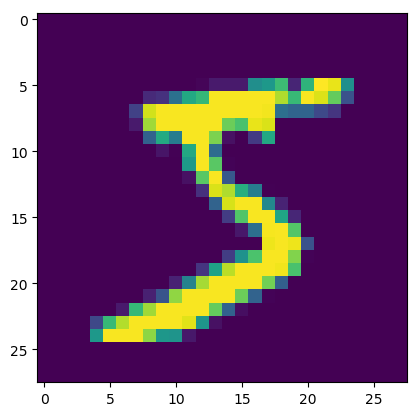

5

In [4]:
using PyPlot

# 一枚目の画像データ(28x28)をプロット
## imshowは縦軸と横軸が反転しているため転置行列を渡す
imshow(train_x[:, :, 1]')

# 一枚目の画像に描かれている数字
train_y[1]

### ニューラルネットワーク構築
今回はすでに学習済みのモデルを使って推論処理のみを行ってみるため、そのモデルに合わせたニューラルネットワークを構築する

構築するニューラルネットワークは以下のようなものである

- 3層ニューラルネットワーク
    - 入力層:
        - 手書き数字の画像データ（サイズ: 28x28）
        - ニューロン数: 28 * 28 = 784
        - 各ニューロンの入力値は 0.0〜1.0 の実数型である必要がある
    - 中間層（隠れ層）1:
        - ニューロン数: 50
        - 活性化関数: シグモイド関数
    - 中間層（隠れ層）2:
        - ニューロン数: 100
        - 活性化関数: シグモイド関数
    - 出力層:
        - ニューロン数: 10（0〜9の数字クラスに分類するため）
        - 活性化関数: ソフトマックス関数

なお、学習済みモデルは python-pickle 形式で保存されているものをGitHubからダウンロードして使用する

In [1]:
"""
Python pickle（Pythonのオブジェクト状態を保存したもの）のローディング
"""

using HTTP
using PyCall
pickle = pyimport("pickle")

# ファイルにオブジェクト状態保存
save_pickle(filename, obj) = begin
    out = open(filename, "w")
    pickle.dump(obj, out)
    close(out)
end

# ファイルからオブジェクト状態復元
load_pickle(filename) = begin
    @pywith pybuiltin("open")(filename, "rb") as f begin
        return pickle.load(f)
    end
end

# インターネット上のファイルからオブジェクト状態復元
model = pickle.loads(
    HTTP.request(
        "GET", "https://github.com/oreilly-japan/deep-learning-from-scratch/blob/master/ch03/sample_weight.pkl?raw=true"
    ).body
)

Dict{Any,Any} with 6 entries:
  "W2" => Float32[-0.10694 0.0159125 … 0.14046 0.0396424; 0.299116 -0.0332223 ……
  "W3" => Float32[-0.421736 0.689445 … -0.305001 0.0275985; -0.524321 -0.143625…
  "b3" => Float32[-0.0602398, 0.00932628, -0.0135995, 0.0216713, 0.0107372, 0.0…
  "b2" => Float32[-0.0147111, -0.0721513, -0.00155692, 0.121997, 0.116033, -0.0…
  "W1" => Float32[-0.00741249 -0.00790439 … -0.0433127 -0.013501; -0.0102975 -0…
  "b1" => Float32[-0.0675032, 0.0695926, -0.0273047, 0.0225609, -0.220015, -0.2…

In [2]:
# 入力層 -> 中間層1 のパラメータ
## 重み: 前層のニューロン数x次層のニューロン数のArray{Float32,2} => 784x50 Array{Float32,2}
## バイアス: 次層のニューロン数のArray{Float32,1} => 50 Array{Float32,1}
println(typeof(model["W1"]), size(model["W1"]))
println(typeof(model["b1"]), size(model["b1"]))

Array{Float32,2}(784, 50)
Array{Float32,1}(50,)


In [3]:
# 中間層1 -> 中間層2 のパラメータ
## 重み: 前層のニューロン数x次層のニューロン数のArray{Float32,2} => 784x50 Array{Float32,2}
## バイアス: 次層のニューロン数のArray{Float32,1} => 100 Array{Float32,1}
println(typeof(model["W2"]), size(model["W2"]))
println(typeof(model["b2"]), size(model["b2"]))

Array{Float32,2}(50, 100)
Array{Float32,1}(100,)


In [4]:
# 中間層2 -> 出力層 のパラメータ
## 重み: 前層のニューロン数x出力数のArray{Float32,2} => 100x10 Array{Float32,2}
## バイアス: 次層のニューロン数のArray{Float32,1} => 10 Array{Float32,1}
println(typeof(model["W3"]), size(model["W3"]))
println(typeof(model["b3"]), size(model["b3"]))

Array{Float32,2}(100, 10)
Array{Float32,1}(10,)


In [9]:
"""
ニューラルネットワーク実装
"""

# ニューラルネットワーク構造体
mutable struct Network
    l::Int # ネットワーク層数
    b::Vector{Array{Float64,2}} # バイアス: [層1: Array{1x次層ニューロン数}, 層2: Array{1x次層ニューロン数}, ...]
    w::Vector{Array{Float64,2}} # 重み: [層1: Array{前層ニューロン数x次層ニューロン数}, 層2: Array{前層ニューロン数x次層ニューロン数}, ...]
end

# 順方向伝搬関数
## Network構造体, 層番号, 活性化関数, 層の入力信号 -> 層の出力信号 z
forward(network::Network, i::Int, h, x::Array{Float64,2})::Array{Float64,2} =
    h(x * network.w[i] + network.b[i])

# 推論処理
## Network構造体, 層番号, 中間層の活性化関数, 出力層の活性化関数, 入力信号 -> 出力信号 y
predict(network::Network, h, σ, x::Array{Float64,2}, i::Int=1)::Array{Float64,2} = 
    i == network.l ? forward(network, i, σ, x) : predict(network, h, σ, forward(network, i, h, x), i + 1)

# 学習済みモデルのパラメータをセットして3層ニューラルネットワーク構築
init(model::Dict{Any,Any})::Network = Network(
    3,
    [
        # i番目の層のバイアス: Array{Float32,1} -> 1 x n Array{Float64,2}にキャスト
        Array{Float64,2}(reshape(model["b1"], (1, :))), # 1 x 50 Array{Float64,1}
        Array{Float64,2}(reshape(model["b2"], (1, :))), # 1 x 100 Array{Float64,1}
        Array{Float64,2}(reshape(model["b3"], (1, :))), # 1 x 10 Array{Float64,1}
    ],
    [
        # i番目の層の重み: Array{Float32,2} -> Array{Float64,2}にキャスト
        Array{Float64,2}(model["W1"]),
        Array{Float64,2}(model["W2"]),
        Array{Float64,2}(model["W3"]),
    ]
)

network = init(model)

Network(3, Array{Float64,2}[[-0.0675032 0.0695926 … -0.151792 0.107168], [-0.0147111 -0.0721513 … 0.0219969 -0.0435861], [-0.0602398 0.00932628 … 0.00576962 0.0532335]], Array{Float64,2}[[-0.00741249 -0.00790439 … -0.0433127 -0.013501; -0.0102975 -0.0161665 … 0.0280981 0.0145091; … ; -0.00761533 0.0202897 … -0.0122986 0.0240704; 0.000279154 -0.0684838 … 0.00743086 -0.0402115], [-0.10694 0.0159125 … 0.14046 0.0396424; 0.299116 -0.0332223 … -0.0972147 0.295026; … ; 0.100016 0.0899286 … -0.0574423 -0.00713823; -0.0222066 -0.0510518 … -0.404208 0.0090801], [-0.421736 0.689445 … -0.305001 0.0275985; -0.524321 -0.143625 … -0.0398552 0.823426; … ; -0.544508 0.537672 … 0.513088 -0.0367016; 1.07228 -0.373002 … -0.261491 0.0317717]])

In [6]:
using MLDatasets

# テスト用画像データとその解答をロード
test_x, test_y = MNIST.testdata()

# 入力値を確認
println(test_x[:, :, 1])

FixedPointNumbers.Normed{UInt8,8}[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.329 0.871 0.263 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.725 0.996 0.447 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.624 0.996 0.282 0.0 

In [8]:
# 入力値をニューラルネットワークモデル用に前処理
## 入力層は 1 x 784 Array{Float64,2} を受け付けるため、以下のように変換
x = Array{Float64,3}(reshape(test_x, (1, 784, :))) # => 1 x 784 x 10,000枚 Array{Flaot64,2}

# 確認
println(x[:, :, 1])

[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.329412 0.72549 0.623529 0.592157 0.235294 0.141176 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.870588 0.996078 0.996078 0.996078 0.996078 0.945

In [10]:
# シグモイド関数
sigmoid(a::Array{Float64,2})::Array{Float64,2} = 1 ./ (1 .+ exp.(-a))

# ソフトマックス関数
softmax(a::Array{Float64,2})::Array{Float64,2} = begin
    c = maximum(a)
    exp_a = exp.(a .- c) # オーバフロー対策
    y = exp_a ./ sum(exp_a)
end

# 学習済みパラメータを適用したニューラルネットワークでテスト画像データ10,000枚に対して推論実行
## 中間層の活性化関数: シグモイド関数
## 出力層の活性化関数: ソフトマックス関数
predict_y = [predict(network, sigmoid, softmax, x[:, :, i]) for i in 1:10000]

10000-element Array{Array{Float64,2},1}:
 [8.44125e-5 2.63506e-6 … 9.37447e-6 0.000818312] 
 [0.00483633 0.00110459 … 0.00128642 4.78647e-8]  
 [1.03583e-7 0.988973 … 0.00123787 8.67147e-5]    
 [0.994115 8.21148e-8 … 4.83602e-5 4.20393e-5]    
 [0.000206643 6.5651e-6 … 0.00143689 0.0326453]   
 [3.03142e-8 0.988501 … 0.0019129 0.00042563]     
 [3.80582e-6 4.50634e-5 … 0.00534385 0.00989904]  
 [9.68234e-7 0.0017533 … 0.0137037 0.949877]      
 [0.00188538 3.49487e-5 … 0.00100305 9.42862e-5]  
 [1.65249e-5 9.82693e-6 … 0.00411958 0.918302]    
 [0.983997 1.14696e-7 … 0.000225202 6.5785e-6]    
 [0.00268705 0.000448766 … 0.0122169 3.45069e-5]  
 [1.93997e-5 9.94208e-6 … 0.000990951 0.965181]   
 ⋮                                                
 [0.000901893 6.3816e-5 … 0.00802066 2.2542e-5]   
 [9.46136e-5 1.70415e-5 … 5.67064e-5 6.74463e-7]  
 [2.71574e-6 7.62577e-5 … 9.98829e-5 0.00313384]  
 [0.000431389 0.000183354 … 0.92585 0.00310115]   
 [0.000188306 1.43884e-6 … 0.000554286 0.

In [11]:
# 予測値: 10000 Vector{1 x 10 Array{Float64,2}}
# 各予測値の10クラスの合計が1.0（100％）になることを確認
[sum(y) for y in predict_y]

10000-element Array{Float64,1}:
 0.9999999999999999
 1.0               
 1.0               
 0.9999999999999999
 1.0               
 0.9999999999999998
 1.0               
 1.0               
 0.9999999999999998
 0.9999999999999999
 0.9999999999999999
 1.0000000000000002
 1.0               
 ⋮                 
 1.0000000000000004
 1.0               
 1.0000000000000002
 1.0               
 1.0               
 0.9999999999999998
 0.9999999999999999
 1.0               
 1.0               
 1.0000000000000002
 0.9999999999999999
 0.9999999999999998

In [12]:
# 各予測値のうち、最大値（最も確率の高い）のindex（数値クラス）を取得
## Juliaのindexは1から始まるため -1 する
predicted = [argmax(y)[2]-1 for y in predict_y]

10000-element Array{Int64,1}:
 7
 2
 1
 0
 4
 1
 4
 9
 6
 9
 0
 6
 9
 ⋮
 5
 6
 7
 8
 9
 0
 1
 2
 3
 4
 5
 6

In [13]:
# 解答データと比較し、予測値の正確性を計測
length(predicted[predicted .== test_y]) / 10000

0.9352

上記の通り、極めて単純な3層ニューラルネットワークでも、十分にパラメータを最適化されていれば、93.5％程度の精度を出すことができる